?  =  variable name, possibly with indexing/slicing  
??? = function / class name  
?????? = complex expression containing variables, functions etc  
???B??? = complex expression that must contain "B"  

# What to do with 10,000 simultaneous neurons?  

# Section 1. Loading and preparing. 

### 1.0 Load in the Python libraries

In [3]:
import os # os stands for "operating system" and includes read/write routines etc. 
import numpy as np # by far the most used library for everyday computation
from matplotlib import pyplot as plt # plotting functions. second most important library.
%matplotlib inline 

# scipy is an "expansion" of numpy with more specialized functions
from scipy import stats # here we import a sub-library of stats functions
from scipy.ndimage import gaussian_filter # here we import gaussian_filter

# sklearn is the "machine learning" library. Has lots of good stuff. Try to find PCA 
from sklearn.decomposition import PCA

In [4]:
# let's inspect the function we imported
gaussian_filter

<function scipy.ndimage.filters.gaussian_filter(input, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)>

In [5]:
# more info about this function
gaussian_filter?

In [6]:
# anything else we imported you want to inspect here?

In [7]:
import scipy
scipy

<module 'scipy' from '/home/neudata/anaconda3/envs/mouseland/lib/python3.7/site-packages/scipy/__init__.py'>

### 1.1 Load the metadata

In [8]:
# this cell loads Suite2p configuration file "ops", and stimulus information (mov, iframe)
mname, datexp, blk = 'TX39', '2019_05_31', '1' # this assignment works! 

root      = '/home/neudata/data/meso/TX39'
mov       = np.load(os.path.join(root, 'mov.npy')) # mov contains the sparse noise frames
iframe    = np.load(os.path.join(root, 'iframe.npy')) # iframe[n] is the microscope frame for the image frame n

# ops is a "pickled" dictionary, not just an array
ops = np.load(os.path.join(root, 'suite2p', 'combined', 'ops.npy'), allow_pickle=True).item() 

In [9]:
# dictionaries have "keys". Figure out how to list the keys. 
ops.keys()

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'h5py', 'h5py_key', 'save_path0', 'subfolders', 'nplanes', 'nchannels', 'functional_chan', 'diameter', 'tau', 'fs', 'force_sktiff', 'save_mat', 'combined', 'num_workers', 'num_workers_roi', 'do_bidiphase', 'bidiphase', 'do_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'do_phasecorr', 'smooth_sigma', 'th_badframes', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'pre_smooth', 'spatial_taper', 'connected', 'navg_frames_svd', 'nsvd_for_roi', 'max_iterations', 'smooth_masks', 'threshold_scaling', 'max_overlap', 'ratio_neuropil', 'ratio_neuropil_to_cell', 'tile_factor', 'inner_neuropil_radius', 'outer_neuropil_radius', 'min_neuropil_pixels', 'high_pass', 'chan2_thres', 'baseline', 'win_baseline', 'sig_baseline', 'prctile_baseline', 'neucoeff', 'allow_overlap', 'xrange', 'yrange', 'roidetect'

In [10]:
ops['max_proj'].shape

(1688, 2450)

<IPython.core.display.Javascript object>


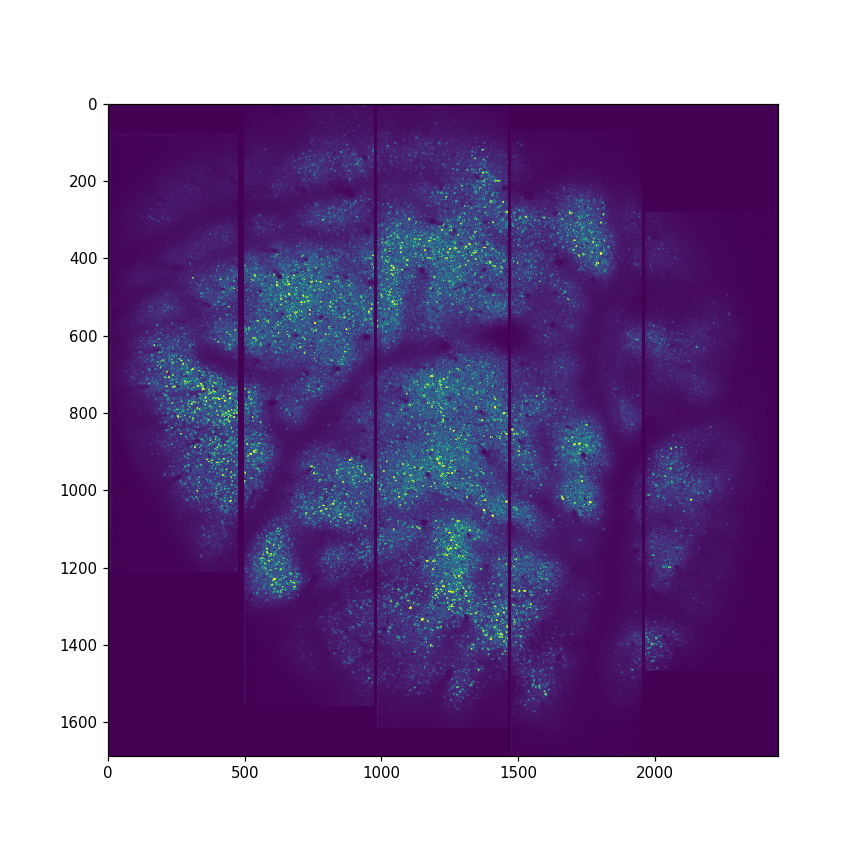

In [13]:
%matplotlib notebook 
# if you need to zoom into a figure, this is the "interactive" mode of matplotlib
# you cannot go back and forth twice between interactive and inline modes (restart nootebook instead)

# display the maximum projection image from ops. You need to access ops like a dictionary. 
plt.figure(figsize=(8,8))
plt.imshow(ops['max_proj'], aspect='auto') 

<IPython.core.display.Javascript object>


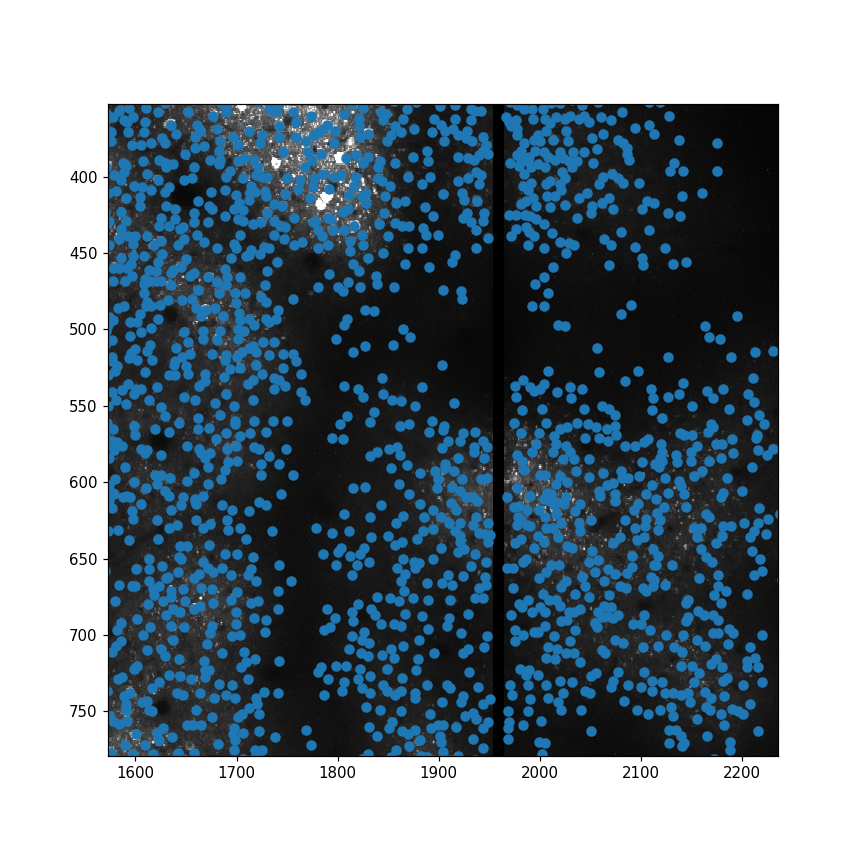

In [14]:
# now let's adjust this plot. 
# Set the saturation of the image to 5000, the colormap to gray, and the aspect ratio to "auto"
plt.figure(figsize=(8,8))
plt.imshow(ops['max_proj'], vmax=5000, cmap = 'gray', aspect ='auto') 

### 1.2 Load the neural data

In [15]:
spks = np.load(os.path.join(root, 'suite2p', 'combined', 'spks.npy'))
stat = np.load(os.path.join(root, 'suite2p', 'combined', 'stat.npy'), allow_pickle=True)

ypos = [stat[k]['med'][0] for k in range(len(stat))] # this is equivalent to a for loop, but written more succintly
xpos = [stat[k]['med'][1] for k in range(len(stat))]

# ypos, xpos are Python "lists". Before we can operate on them, they should be converted to Numpy "arrays".
ypos, xpos = np.array(ypos), np.array(xpos)

ypos, xpos = ypos/.5, xpos/.75 # this recording had 0.5 pixels/um in Y and 0.75 pixels/um in X

print('total neurons %d'%len(stat))
print('recorded from an area of %2.2f um by %2.2f um'%(np.ptp(ypos), np.ptp(xpos)))

total neurons 18795
recorded from an area of 3212.00 um by 3122.67 um


In [21]:
stat[100]

{'ypix': array([877, 877, 877, 877, 877, 878, 878, 878, 878, 878, 878, 878, 879,
        879, 879, 879, 879, 879, 879, 879, 880, 880, 880, 880, 880, 880,
        880, 880, 880, 881, 881, 881, 881, 881, 881, 881, 881, 881, 881,
        882, 882, 882, 882, 882, 882, 882, 882, 882, 883, 883, 883, 883,
        883, 884], dtype=int32),
 'lam': array([13.043887 , 19.994452 , 19.723564 , 13.326485 ,  6.958495 ,
        22.276176 , 29.300999 , 24.809378 , 23.857668 , 23.849804 ,
        20.046047 ,  9.091024 , 15.776936 , 18.073372 , 18.377565 ,
        19.425192 , 22.3877   , 27.082926 , 28.19384  , 11.548126 ,
        18.569695 , 24.138056 , 20.128609 , 20.094688 , 22.597097 ,
        28.114777 , 40.00904  , 45.126865 , 20.97461  ,  6.99569  ,
        20.447145 , 34.99743  , 36.234985 , 33.967655 , 35.757915 ,
        45.184956 , 61.804604 , 63.74392  , 24.913445 ,  4.944059 ,
        12.776862 , 27.952904 , 46.495094 , 66.26953  , 72.248665 ,
        59.9197   , 39.97814  , 14.7202835,  8.8

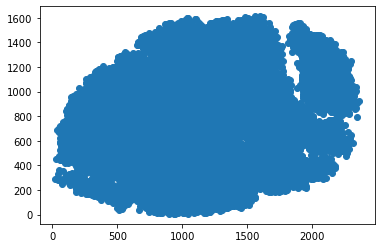

In [18]:
# make a "scatter plot" overlaid on top of the image in the cell above. 
# because we are in notebook mode, this will plot to the last interactive plot
plt.scatter(xpos*.75, ypos*.5) 

In [17]:
# switch back to inline plots so we can make them bigger
%matplotlib inline

### 1.3 By the end of this section you should have spks, Timeline, xpos, ypos in your workspace. 
Try to explore the contents of these variables, for example:

In [22]:
print(stat[0].keys())

dict_keys(['ypix', 'lam', 'xpix', 'mrs', 'mrs0', 'compact', 'med', 'npix', 'footprint', 'npix_norm', 'overlap', 'ipix', 'radius', 'aspect_ratio', 'skew', 'std', 'iplane'])


In [23]:
print(np.min(ypos), np.max(ypos), np.min(xpos), np.max(xpos))

12.0 3224.0 26.666666666666668 3149.3333333333335


In [24]:
# use this empty cell to determine how many timepoints are in the dataset, and how many images have been presented 
print(spks.shape)
print(mov.shape)

(18795, 30766)
(12, 36, 30564)


# Section 2. Plotting and visualizing the data

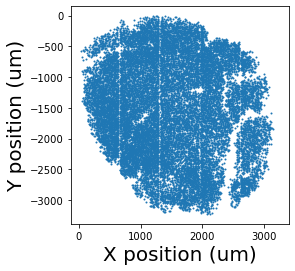

In [25]:
# POSITIONS OF ALL NEURONS
plt.scatter(xpos, -ypos, s = 1) # note we have to invert the Ypos
plt.xlabel('X position (um)', fontsize=20) # this is how you make axis labels
plt.ylabel('Y position (um)', fontsize=20) 
plt.axis('square') # make both axes the same size
plt.show() # when you are done

Text(0.5, 1.0, 'example frame')

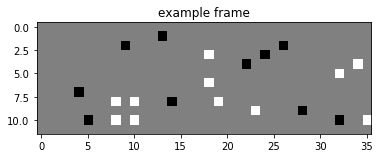

In [28]:
# display movie frame 100
plt.imshow(mov[:,:,101], cmap='gray')
plt.title('example frame') # without plt show, the result of the last command is displayed

In [29]:
dt     = 1 # time offset between stimulus and neural activity (don't change)
ivalid = iframe+dt<spks.shape[-1] # remove timepoints that fall after the neural recording ended
iframe = iframe[ivalid] 
mov = mov[:, :, ivalid]

# subsample the neural timepoints corresponding to these movie frames
S   = spks[:, iframe + dt]

# z-score the neural activity before doing anything. axis specifies the dimension. 
S = stats.zscore(S, axis=1) 

Text(0.5, 0, 'time points')

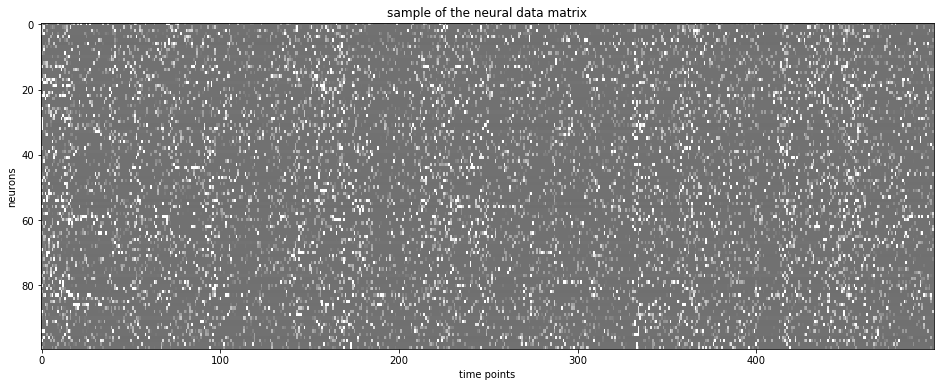

In [34]:
plt.figure(figsize=(16,6))
# display the first 100 neurons and the first 500 timepoints from S
plt.imshow(S[2000:2100, :500], vmax = 3, vmin = -3, aspect='auto', cmap = 'gray')
plt.title('sample of the neural data matrix')
plt.ylabel('neurons') 
plt.xlabel('time points')

# Section 3. Receptive fields  (ON - OFF)

### 3.1 First, compute ordinary ON - OFF receptive fields

In [48]:
nn     = 8867
NN, NT = S.shape 
S0     = S[nn, :]

X = np.reshape(mov, [-1, NT]) # reshape to Npixels by Ntimepoints. -1 means the dimension is automatically inferred. 
X = X-0.5 # subtract the gray level
X = np.abs(X)
X = stats.zscore(X, axis=1) # z-score X along axis 1
X = X / NT**.5  # normalize Xto unit norm. 
npix = X.shape[0]

B0 = X @ S0 # stimulus triggered receptive field for one neuron
# reshape B0 into the vertical and horizontal dimensions of mov
B0 = np.reshape(B0, (mov.shape[0], mov.shape[1]))

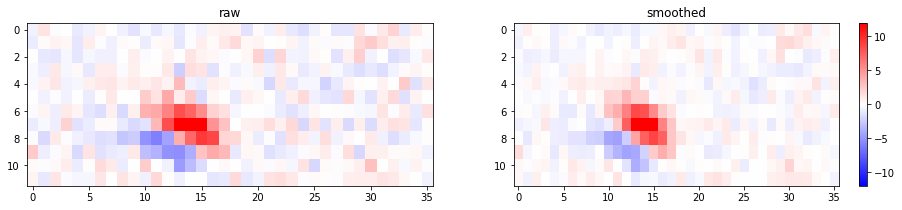

In [49]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
# plot the receptive field for each neuron. Use a "blue, white, red" colormap
plt.imshow(B0, aspect='auto', vmin=-12, vmax=12, cmap = 'bwr') 
plt.title('raw')

plt.subplot(1,2,2)
B1 = gaussian_filter(B0, [.5, .5]) # smooth each receptive field a little
plt.imshow(B1, aspect='auto', vmin=-12, vmax=12, cmap = 'bwr') # plot the receptive field for each neuron
plt.title('smoothed')
plt.colorbar()
plt.show()


In [ ]:
# go back above and take the absolute value of X after subtracting the gray level
X = np.?(X) # take the absolute value of X

### 3.2 Receptive fields for all neurons

In [50]:
NN, NT = S.shape 

# compute X as before
X = np.reshape(mov, [-1, NT]) # reshape to Npixels by Ntimepoints
X = X-0.5 # subtract the gray level
X = stats.zscore(X, axis=1)/NT**.5  # z-score each pixel separately
npix = X.shape[0]


B0 = X @ S.T # get the receptive fields for each neuron        
B0 = np.reshape(B0, [mov.shape[0], mov.shape[1], NN])
# smooth each receptive field by 0.5 gaussian standard deviation along horizontal and vertical dimension
# smooth by 0 gaussian standard deviation along the neurons dimension. 
B0 = gaussian_filter(B0, [.5, .5, 0]) 

B00 = B0.copy() # make a copy of B0 for later

In [52]:
B0.shape

(12, 36, 18795)

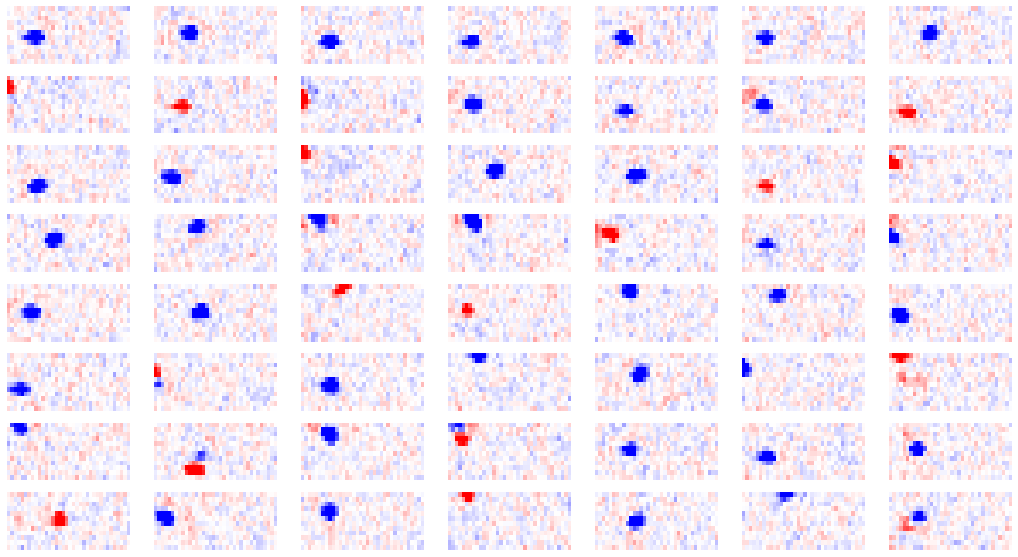

In [58]:
# create a figure of vertiical size 18 and horizontal size 10.
plt.figure(figsize=(18, 10))
np.random.seed(1) # set the seed for the random number generator, so that our random samples are reproducible
rperm = np.random.permutation(NN) # choose a randomly permuted set of neurons

#isort = rperm
#isort = np.argsort(np.min(B0, axis=(0,1))) # try this one next! 
#isort = np.argsort(np.max(B0, axis=(0,1)))[::-1] # this is how we get a "descending" sort

# now sort by the (max - min) range of each receptive field
isort = np.argsort(np.max(B0, axis=(0,1)) - np.min(B0, axis=(0,1)))[::-1]

for j in range(8*7):
    plt.subplot(8,7,j+1)
    # show the receptive field for unit isort[j]
    plt.imshow(B0[:,:,isort[j]], aspect='auto', vmin=-6, vmax=6, cmap = 'bwr') # plot the receptive field for each neuron
    plt.axis('off')
    
plt.show()

# Section 4. Receptive fields (ON + OFF)

### 4.1 Do the neurons care about contrast SIGN ?

In [59]:
# like before, but with the absolute value
X = np.reshape(mov, [-1, NT]) # reshape to Npixels by Ntimepoints
X = X-0.5 # does not matter if a pixel is black (0) or white (1)
X = np.abs(X) # response is the same for ON and OFF squares
X = stats.zscore(X, axis=1)/NT**.5  # z-score each pixel separately

B0 = X @ S.T # get the receptive fields for each neuron

B0 = np.reshape(B0, [mov.shape[0], mov.shape[1], -1])
B0 = gaussian_filter(B0, [.5, .5, 0]) # smooth each receptive field a little

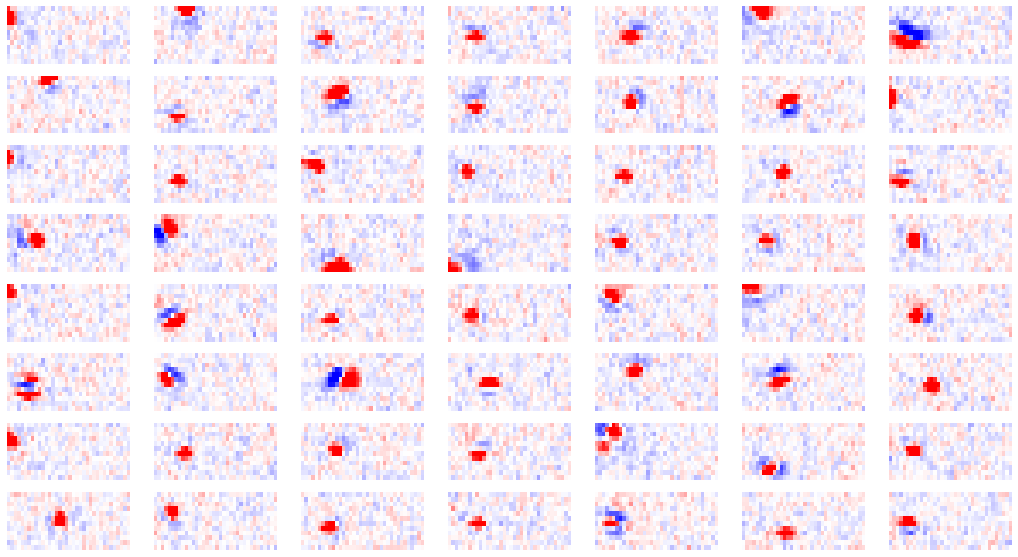

In [61]:
plt.figure(figsize=(18, 10))
# how do we make sure we get the same random sample of neurons as before?
np.random.seed(1) # set the seed for the random number generator, so that our random samples are reproducible
rperm = np.random.permutation(NN) # choose a randomly permuted set of neurons

#isort = rperm
#isort = np.argsort(np.min(B0, axis=(0,1)))
#isort = np.argsort(np.max(B0, axis=(0,1)))[::-1]
isort = np.argsort(np.max(B0, axis=(0,1)) - np.min(B0, axis=(0,1)))[::-1]

for j in range(7*8):
    plt.subplot(8,7,j+1)
    plt.imshow(B0[:,:,isort[j]], aspect='auto', vmin=-6, vmax=6, cmap = 'bwr') # plot the receptive field for each neuron
    plt.axis('off')
    
plt.show()

### 4.2 Let's average the ON+OFF receptive fields over groups of neurons

In [76]:
sig = 1 # average neurons within this distance
B = np.zeros(B0.shape)
for j in range(NN):
    # for each neuron, let's find all others within sig distance in um
    ds = (ypos[j] - ypos)**2 + (xpos[j] - xpos)**2
    ix = ds**.5 < sig    
    B[:,:,j] = np.mean(B0[:,:,ix], axis=-1) # average receptive fields of ix=True neurons
    
#Amax = ???B??? # compute the maximum response of each neuron

In [77]:
Amax = np.max(B, axis=(0,1))  # compute the maximum response of each neuron
print(Amax.shape)

(18795,)


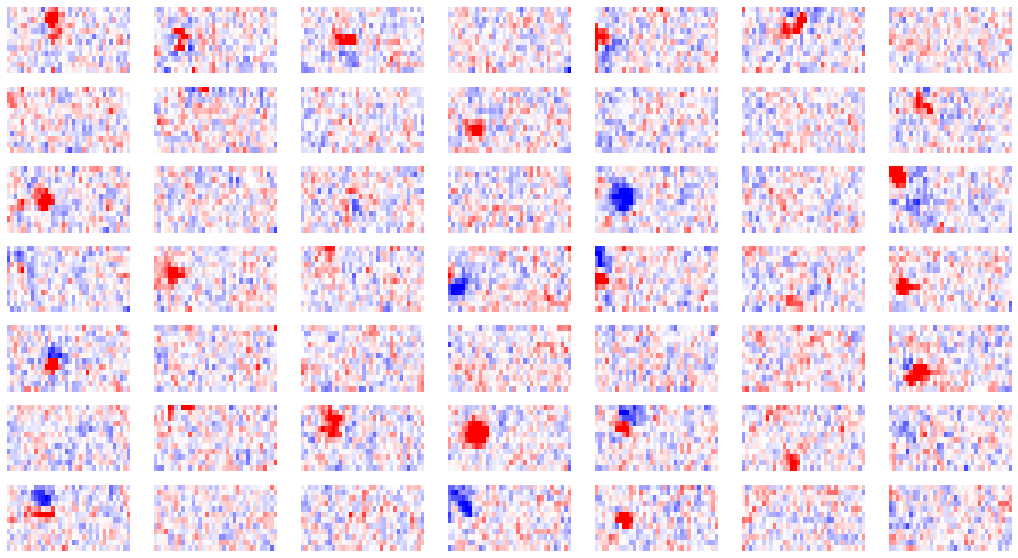

In [78]:
plt.figure(figsize=(18, 10))
np.random.seed(1) # set the seed for the random number generator, so that our random samples are reproducible
rperm = np.random.permutation(NN) # choose a random set of neurons

for j in range(7*7):
    plt.subplot(7,7,j+1)
    plt.imshow(B[:,:,rperm[j]], aspect='auto', vmin=-3, vmax=3, cmap = 'bwr') # plot the receptive field for each neuron
    plt.axis('off')
    
plt.show()

### 4.3 Finally, let's display the retinotopy over the recording area

In [79]:
imax = np.argmax(np.reshape(B, [-1,NN]), axis=0) # find the pixel corresponding to the max response for each cell
ly, lx, nstim = mov.shape # get the dimensions of the stimulus

# use "unravel_index" to go from a linear index imax to a two-dimensional index (ymax,xmax)
ymax, xmax = np.unravel_index(imax, (ly,lx)) # unravel an index for a (1,ly*lx) array, to two indices for an (ly, lx) array
xmax = np.minimum(17, xmax) # threshold xmax at 17 (middle of the screen)


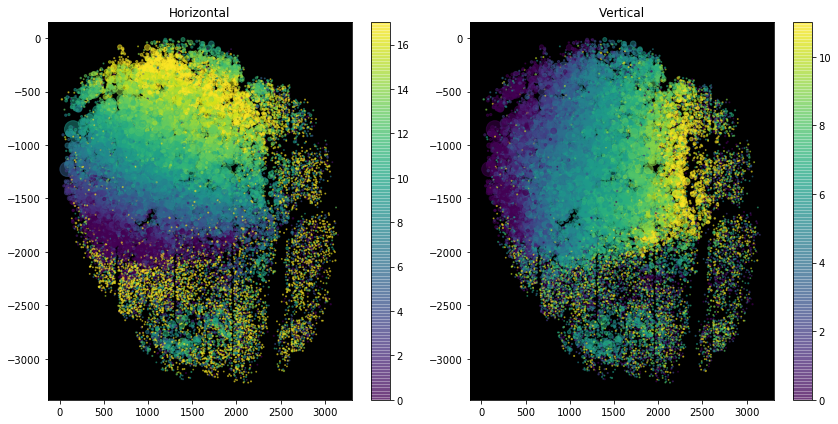

In [82]:

plt.figure(figsize=(12,6))

plt.subplot(1,2,1, facecolor= [0, 0, 0]) # figure background should be black
plt.scatter(xpos, -ypos, s = .25 * Amax**2 , c = xmax, cmap='viridis', alpha = .5) 
# dot size should be proportional to max response Amax times a factor
# the dot color should be determined by the preferred horizontal position
plt.title('Horizontal')
plt.colorbar()

plt.subplot(1,2,2, facecolor=[0,0,0]) # figure background should be black
plt.scatter(xpos, -ypos, s = .25 * Amax**2, c = ymax, cmap='viridis', alpha = .5) 
# same as above for preferred vertical position
plt.title('Vertical')
plt.colorbar()

plt.tight_layout()

plt.show()